<a href="https://colab.research.google.com/github/mcm1010184/Asilo/blob/mari/Diabetes_Estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Tipos de datos en nuestro data set

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Verificacion de cantidad de datos nulos o faltantes

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

<ipython-input-19-56cdd405bb30>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  triangle = np.zeros_like(df.corr(), dtype=np.bool)


<Axes: >

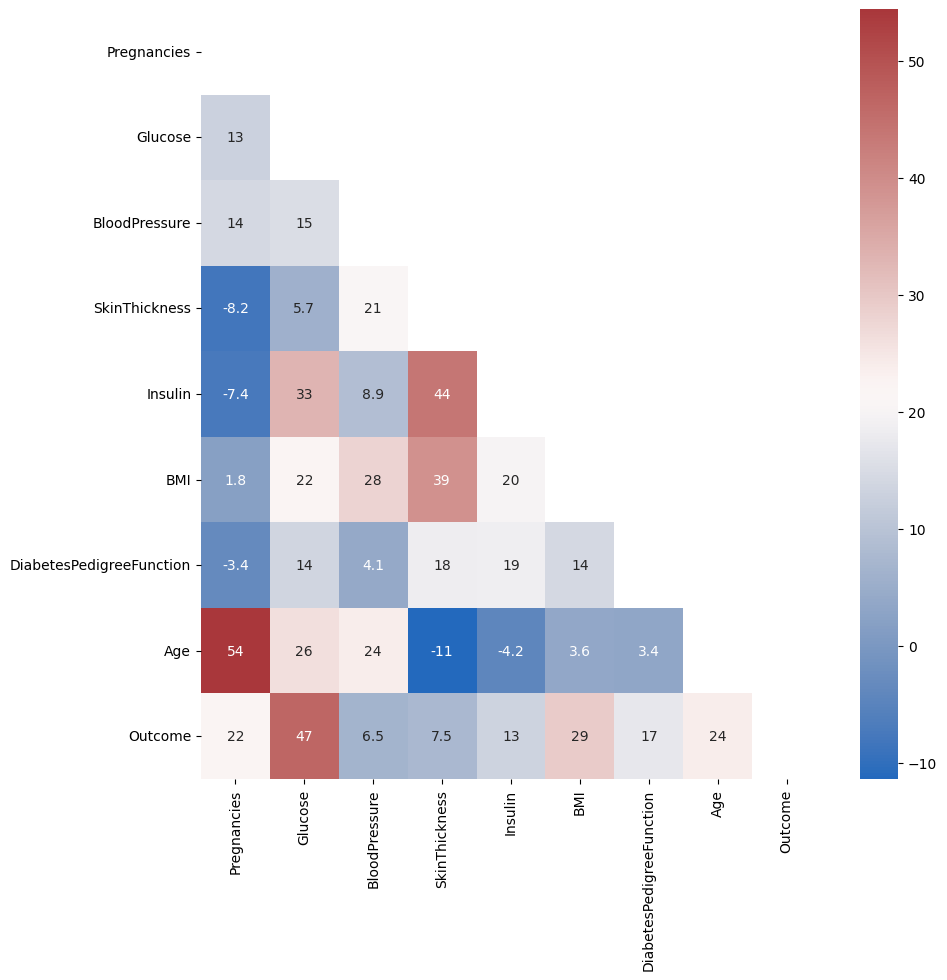

In [ ]:
triangle = np.zeros_like(df.corr(), dtype=np.bool)
triangle[np.triu_indices_from(triangle)] = True

plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() * 100, annot=True, mask=triangle, cmap='vlag')

In [ ]:
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

### RAMDOM FOREST






In [ ]:

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop('Outcome', axis=1)  # Excluir la columna 'Outcome' como etiqueta
y = df['Outcome']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

# Crear un modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Exactitud del modelo: {accuracy:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nInforme de Clasificación:")
print(classification_rep)



Exactitud del modelo: 0.75

Matriz de Confusión:
[[121  30]
 [ 27  53]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



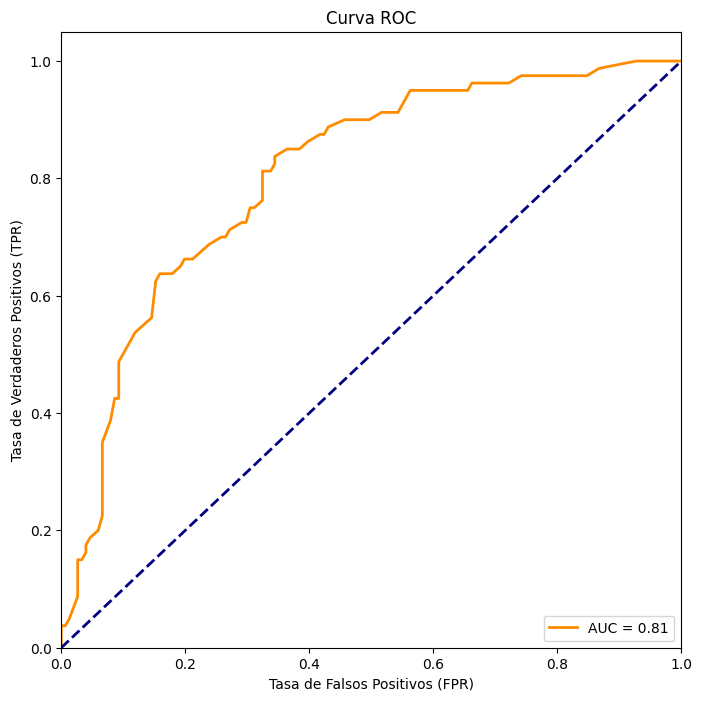

In [ ]:

# Obtener probabilidades predichas
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### KNN

In [ ]:

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Crear un modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos según sea necesario

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Exactitud del modelo: {accuracy:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nInforme de Clasificación:")
print(classification_rep)

Exactitud del modelo: 0.69

Matriz de Confusión:
[[114  37]
 [ 35  45]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### REGRESION LINEAL

Error cuadrático medio (MSE): 0.18
Coeficiente de determinación (R2): 0.22


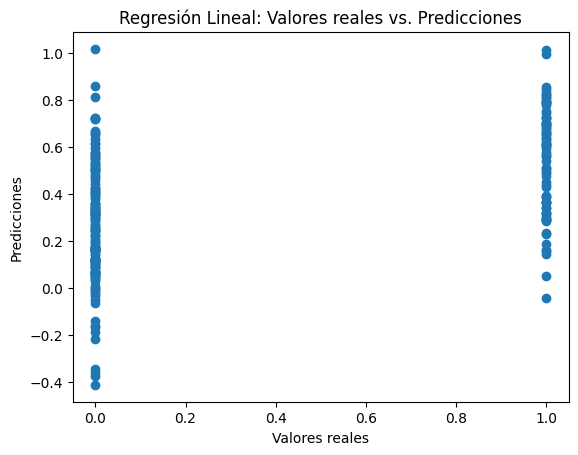

In [ ]:

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Crear un modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R2): {r2:.2f}")

# Visualizar las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predicciones")
plt.show()

BAYES